In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [7]:
# Load the Boston Housing dataset
boston_housing_url = "https://github.com/raccamateo/NEC_A1/raw/main/Boston_Housing.xlsx"
boston_housing_data = pd.read_excel(boston_housing_url)

In [8]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(boston_housing_data.head())

First few rows of the dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [9]:
# Checking for Missing Values and filling them with the mean of the column
boston_housing_data.fillna(boston_housing_data.mean(), inplace=True)
missing_values = boston_housing_data.isnull().sum()
print("Missing values in each column after filling with mean:")
print(missing_values)

Missing values in each column after filling with mean:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


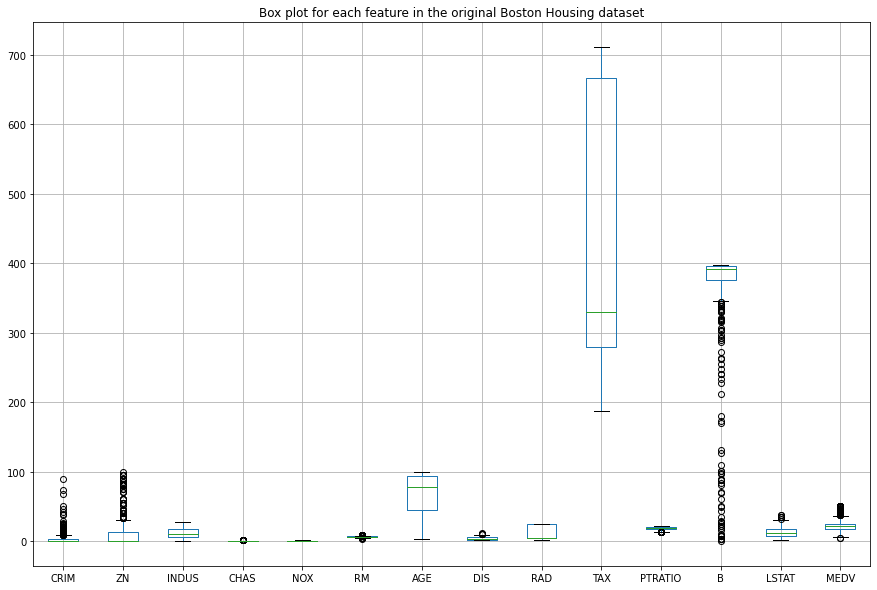

In [10]:
# Looking for Outliers using box plots on the original data (before normalization)
plt.figure(figsize=(15, 10))
boston_housing_data.boxplot()
plt.title("Box plot for each feature in the original Boston Housing dataset")
plt.show()

In [11]:
# Identify and handle outliers using the IQR method
Q1 = boston_housing_data.quantile(0.25)
Q3 = boston_housing_data.quantile(0.75)
IQR = Q3 - Q1

In [12]:
# Removing outliers based on the IQR method for each feature
boston_housing_data = boston_housing_data[~((boston_housing_data < (Q1 - 1.5 * IQR)) | (boston_housing_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
# Standardize the features using Z-score normalization, excluding the target variable
scaler = StandardScaler()
features = boston_housing_data.drop(columns=['MEDV'])  # Assuming 'Target' is the column name for the target variable
scaled_features = scaler.fit_transform(features)
boston_housing_data_standardized = pd.DataFrame(scaled_features, columns=features.columns)
boston_housing_data_standardized['MEDV'] = boston_housing_data['MEDV'].values  # Adding the target column back

In [15]:
# Shuffle the dataset
boston_housing_data_standardized = boston_housing_data_standardized.sample(frac=1, random_state=0).reset_index(drop=True)

In [16]:
# Save the standardized dataset
boston_housing_data_standardized.to_csv('standardized_boston_housing_data.csv', index=False)

In [17]:
# Displaying the first few rows of the standardized dataset
print("First few rows of the standardized dataset:")
print(boston_housing_data_standardized.head())

First few rows of the standardized dataset:
       CRIM        ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0 -0.434787 -0.454638 -0.332292   0.0 -0.145253 -0.776487  0.969543 -1.019686   
1 -0.400088 -0.454638 -0.153903   0.0  0.525223 -0.347331 -0.027698 -0.907509   
2 -0.495164 -0.454638 -1.145307   0.0 -0.465019  2.138491 -0.110177 -0.338186   
3 -0.463479 -0.454638 -1.227398   0.0 -0.918880 -0.009634  0.133510 -0.292489   
4 -0.414771  1.851904 -1.157936   0.0 -0.940541  1.512345 -1.268626  0.050384   

        RAD       TAX   PTRATIO         B     LSTAT  MEDV  
0 -0.298539  0.155393  1.200250  0.593077  1.238562  19.5  
1 -0.150101  0.205362  0.227409  0.703770  0.175364  21.2  
2 -0.743856 -0.658385 -0.573754  0.628175 -1.161970  28.7  
3 -0.743856 -0.615554 -0.459302  0.247500 -0.117294  21.4  
4 -0.298539 -1.043859 -2.233307  0.703770 -1.319412  35.1  
